## <a href="https://school.programmers.co.kr/learn/courses/30/lessons/178870?language=python3"> 연속된 부분 수열의 합</a>

비내림차순으로 정렬된 수열이 주어질 때, 다음 조건을 만족하는 부분 수열을 찾으려고 합니다.

기존 수열에서 임의의 두 인덱스의 원소와 그 사이의 원소를 모두 포함하는 부분 수열이어야 합니다.
부분 수열의 합은 k입니다.
합이 k인 부분 수열이 여러 개인 경우 길이가 짧은 수열을 찾습니다.
길이가 짧은 수열이 여러 개인 경우 앞쪽(시작 인덱스가 작은)에 나오는 수열을 찾습니다.
수열을 나타내는 정수 배열 sequence와 부분 수열의 합을 나타내는 정수 k가 매개변수로 주어질 때, 위 조건을 만족하는 부분 수열의 시작 인덱스와 마지막 인덱스를 배열에 담아 return 하는 solution 함수를 완성해주세요. 이때 수열의 인덱스는 0부터 시작합니다.

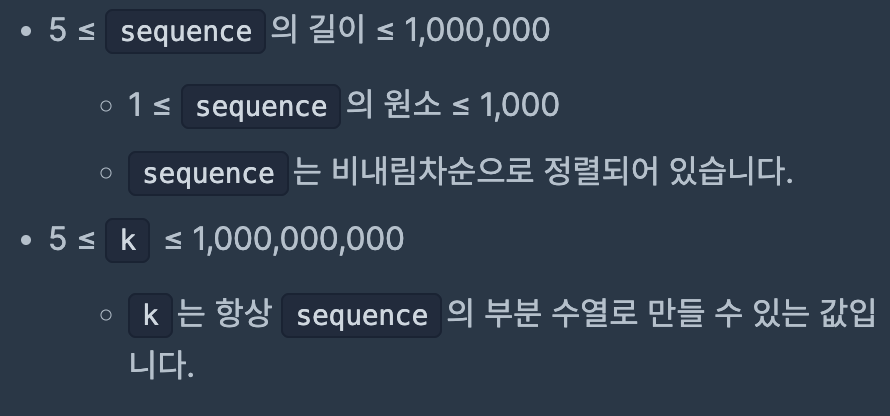

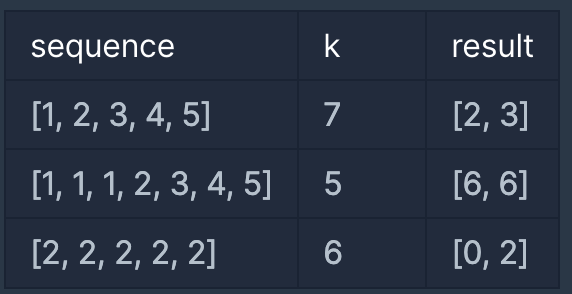

In [29]:
### 시간초과 코드임 
# 10억개라는 사실을 간과했음

def solution(sequence, k):
    seq = []
    i = 0

    while True:
        if i == len(sequence):
            break
        
        tmp = []
        idx_tmp = []
        
        for idx in range(i, len(sequence)):
            tmp.append(sequence[idx])
            idx_tmp.append(idx)
            
            if sum(tmp) == k:
                seq.append(idx_tmp)
                break
            elif sum(tmp) > k:
                break
        i += 1
    
    length_seq = [len(row) for row in seq]
    cur = length_seq.index(min(length_seq))
    
    return [min(seq[cur]), max(seq[cur])]

In [31]:
solution([2, 2, 2, 2, 2], 6)

[0, 2]

- 위 코드는 속도가 너무 느림
- 따라서 더 빠르게 작동하는 코드로 수정해야됨
#### 투 포인터 유형

In [33]:
def solution(sequence, k):
    n = len(sequence)
    start, end = 0, 0
    current_sum = 0
    min_length = float('inf')
    result = []

    while end < n:
        current_sum += sequence[end]
        
        while current_sum > k and start <= end:
            current_sum -= sequence[start]
            start += 1
        
        if current_sum == k:
            if end - start + 1 < min_length:
                min_length = end - start + 1
                result = [start, end]
        
        end += 1
    
    return result


[2, 3]


## <a href="https://school.programmers.co.kr/learn/courses/30/lessons/154539"> 뒤에있는 큰 수 찾기 </a>

정수로 이루어진 배열 numbers가 있습니다. 배열 의 각 원소들에 대해 자신보다 뒤에 있는 숫자 중에서 자신보다 크면서 가장 가까이 있는 수를 뒷 큰수라고 합니다.
정수 배열 numbers가 매개변수로 주어질 때, 모든 원소에 대한 뒷 큰수들을 차례로 담은 배열을 return 하도록 solution 함수를 완성해주세요. 단, 뒷 큰수가 존재하지 않는 원소는 -1을 담습니다.

#### Stack 유형

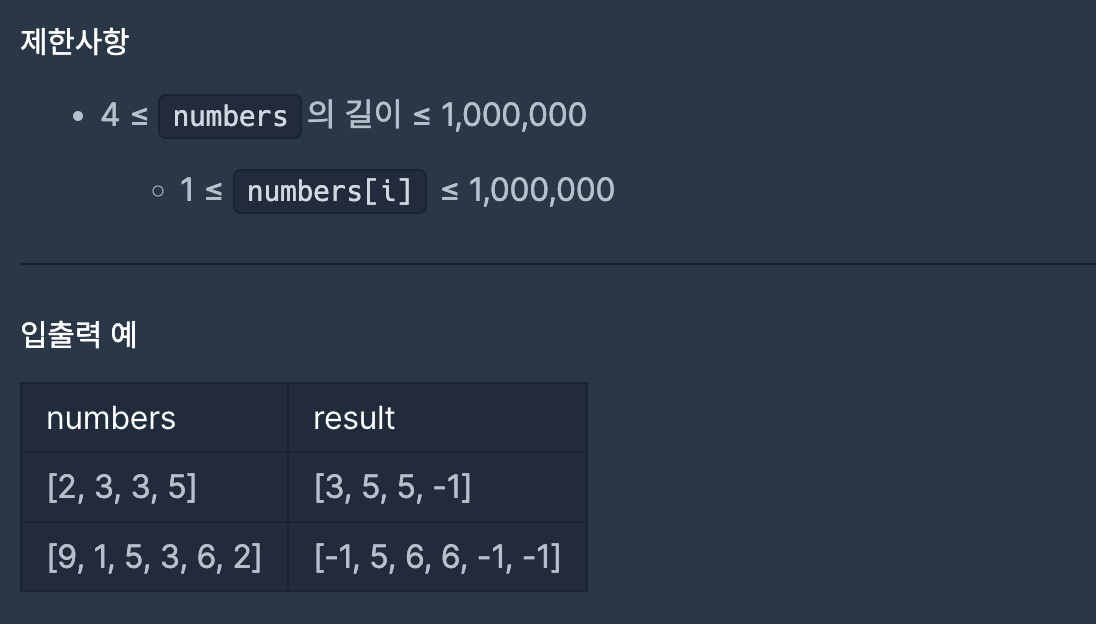

In [ ]:
def solution(numbers):
    answer = [0 for i in range(len(numbers))]
    
    for i in range(len(numbers)):
        cur = numbers[i]
        
        if numbers[i+1] > numbers[i]:
            answer[i] = numbers[i+1] 
    
    return answer

## <a href="https://school.programmers.co.kr/learn/courses/30/lessons/42885"> 구명보트 </a>

무인도에 갇힌 사람들을 구명보트를 이용하여 구출하려고 합니다. 구명보트는 작아서 한 번에 최대 2명씩 밖에 탈 수 없고, 무게 제한도 있습니다.

예를 들어, 사람들의 몸무게가 [70kg, 50kg, 80kg, 50kg]이고 구명보트의 무게 제한이 100kg이라면 2번째 사람과 4번째 사람은 같이 탈 수 있지만 1번째 사람과 3번째 사람의 무게의 합은 150kg이므로 구명보트의 무게 제한을 초과하여 같이 탈 수 없습니다.

구명보트를 최대한 적게 사용하여 모든 사람을 구출하려고 합니다.

사람들의 몸무게를 담은 배열 people과 구명보트의 무게 제한 limit가 매개변수로 주어질 때, 모든 사람을 구출하기 위해 필요한 구명보트 개수의 최솟값을 return 하도록 solution 함수를 작성해주세요.

#### Two Pointer

In [ ]:
def solution(people, limit):
    people.sort()
    left, right = 0, len(people) - 1
    boats = 0

    while left <= right:
        if people[left] + people[right] <= limit:
            left += 1
        right -= 1
        boats += 1

    return boats